In [ ]:


import numpy as np #Operaciones matemáticas rápidas sobre matrices
import pandas as pd #biblioteca de análisis y manipulación de datos para Python
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns #permite generar fácilmente gráficos
import statsmodels.api as sm

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Especifica la ruta al archivo en Google Drive
file_path = '/content/drive/My Drive/ASESINATOS_BD_LIMPIA.csv'
df = pd.read_csv(file_path)
df

,AREA_DEL_HECHO,LUGAR,DIA,HORA_INFRACCION,ARMA,EDAD,SEXO,ANTECEDENTES,DISTRITO,PRESUNTA_MOTIVACION
0,URBANO,VIA PUBLICA,JUEVES,H01,ARMA DE FUEGO,19,HOMBRE,SI,PORTETE,VIOLENCIA COMUNITARIA
1,RURAL,VIA PUBLICA,JUEVES,H16,ARMA BLANCA,28,HOMBRE,SI,NUEVA PROSPERINA,DELINCUENCIA COMUN
2,URBANO,LUGARES PRIVADOS,VIERNES,H01,ARMA BLANCA,35,HOMBRE,SI,NUEVA PROSPERINA,DELINCUENCIA COMUN
3,RURAL,VIA PUBLICA,MIERCOLES,H17,ARMA DE FUEGO,58,HOMBRE,SI,PROGRESO,VIOLENCIA COMUNITARIA
4,URBANO,VIA PUBLICA,LUNES,H23,ARMA DE FUEGO,27,HOMBRE,SI,SUR,DELINCUENCIA COMUN
...,...,...,...,...,...,...,...,...,...,...
6915,URBANO,VIA PUBLICA,MIERCOLES,H22,ARMA DE FUEGO,42,HOMBRE,SI,DURAN,DELINCUENCIA COMUN
6916,URBANO,VIA PUBLICA,JUEVES,H19,ARMA DE FUEGO,29,HOMBRE,SI,PASCUALES,DELINCUENCIA COMUN
6917,URBANO,VIA PUBLICA,JUEVES,H23,ARMA DE FUEGO,28,HOMBRE,SI,DURAN,DELINCUENCIA COMUN
6918,URBANO,VIA PUBLICA,LUNES,H06,ARMA DE FUEGO,18,HOMBRE,SI,SUR,DELINCUENCIA COMUN


In [ ]:


#verifico datos nulos
df.isnull().sum()

,0
AREA_DEL_HECHO,0
LUGAR,0
DIA,0
HORA_INFRACCION,0
ARMA,0
EDAD,0
SEXO,0
ANTECEDENTES,0
DISTRITO,0
PRESUNTA_MOTIVACION,0


In [ ]:

ds=pd.DataFrame(df)
#Presenta el numero de filas
print("El número de filas(observaciones) es: ",ds.shape[0])

#Presenta el numero de columnas
print("El número de columnas(variables) es: ",len(ds.columns))

El número de filas(observaciones) es:  6920
El número de columnas(variables) es:  10


In [ ]:

# tipos de la variables
ds.dtypes

,0
AREA_DEL_HECHO,object
LUGAR,object
DIA,object
HORA_INFRACCION,object
ARMA,object
EDAD,int64
SEXO,object
ANTECEDENTES,object
DISTRITO,object
PRESUNTA_MOTIVACION,object


In [ ]:
df['PRESUNTA_MOTIVACION'].value_counts()


,count
PRESUNTA_MOTIVACION,
DELINCUENCIA COMUN,5882
VIOLENCIA COMUNITARIA,917
VIOLENCIA INTRAFAMILIAR,69
TRANSNACIONAL,32
TERRORISMO,15
SICOPATOLOGIAS,4
VIOLENCIA SEXUAL,1


In [ ]:


df['PRESUNTA_MOTIVACION'] = df['PRESUNTA_MOTIVACION'].apply(lambda x:
    1 if x in ['VIOLENCIA COMUNITARIA'] else
    2 if x in ['DELINCUENCIA COMUN'] else
    3 if x in ['VIOLENCIA INTRAFAMILIAR'] else
    3 if x in ['VIOLENCIA SEXUAL'] else
    4 if x in ['TRANSNACIONAL'] else
    5 if x in ['SICOPATOLOGIAS'] else
    6 #TERRORISMO
    )


In [ ]:
df['PRESUNTA_MOTIVACION'].unique()

array([1, 2, 3, 4, 5, 6])

In [ ]:
df['DISTRITO'].value_counts()

,count
DISTRITO,
NUEVA PROSPERINA,1157
SUR,1079
PASCUALES,1023
DURAN,849
ESTEROS,675
PORTETE,597
9 DE OCTUBRE,441
FLORIDA,413
PROGRESO,288


In [ ]:
df['DISTRITO'] = df['DISTRITO'].apply(lambda x:
    2 if x in ['PORTETE'] else
    1 if x in ['NUEVA PROSPERINA'] else
    3 if x in ['PROGRESO'] else
    1 if x in ['SUR'] else
    3 if x in ['FLORIDA'] else
    2 if x in ['9 DE OCTUBRE'] else
    1 if x in ['PASCUALES'] else
    2 if x in ['DURAN'] else
    2 if x in ['ESTEROS'] else
    3 if x in ['MODELO'] else
    3 if x in ['CEIBOS'] else
    3 # if x in ['SAMBORONDON'] else
)


In [ ]:
df['DISTRITO'].value_counts()

,count
DISTRITO,
1,3259
2,2562
3,1099


In [ ]:
print(df['DISTRITO'].unique())

[2 1 3]


In [ ]:
df['ANTECEDENTES'].value_counts()

,count
ANTECEDENTES,
SI,5884
NO,1036


In [ ]:

df['ANTECEDENTES'] = df['ANTECEDENTES'].apply(lambda x:
    1 if x == 'SI' else
    2)

In [ ]:
print(df['ANTECEDENTES'].unique())

[1 2]


In [ ]:
df['AREA_DEL_HECHO'].value_counts()

,count
AREA_DEL_HECHO,
URBANO,6709
RURAL,211


In [ ]:
df['AREA_DEL_HECHO'] = df['AREA_DEL_HECHO'].apply(lambda x: 1 if x == 'URBANO' else 2)



In [ ]:
print(df['AREA_DEL_HECHO'].unique())

[1 2]


In [ ]:
df['LUGAR'].value_counts()

,count
LUGAR,
VIA PUBLICA,5112
LUGARES PRIVADOS,1808


In [ ]:
df['LUGAR'] = df['LUGAR'].apply(lambda x:
    # Categoría 1: Vía pública
    1 if x == 'VIA PUBLICA' else
    # Categoría 2: Lugares relacionados con transporte
    2 #'LUGARES PRIVADOS'
)




In [ ]:
print(df['LUGAR'].unique())

[1 2]


In [ ]:
df['DIA'].value_counts()

,count
DIA,
DOMINGO,1232
SABADO,1095
VIERNES,1000
MARTES,980
LUNES,916
JUEVES,850
MIERCOLES,847


In [ ]:
df['DIA']= df['DIA'].apply(lambda x:
                                    3 if x == 'LUNES' else
                                    2 if x == 'MARTES' else
                                    4 if x == 'MIERCOLES' else
                                    3 if x == 'JUEVES' else
                                    2 if x == 'VIERNES' else
                                    1 if x == 'SABADO' else
                                    1)


In [ ]:
print(df['DIA'].unique())

[3 2 4 1]


In [ ]:
df['DIA'].value_counts()

,count
DIA,
1,2327
2,1980
3,1766
4,847


In [ ]:
df['EDAD'].value_counts()

,count
EDAD,
30,602
25,326
24,296
28,288
27,272
...,...
95,1
94,1
89,1


In [ ]:
df['EDAD'] = df['EDAD'].apply(lambda x:
    1 if 1 <= x <= 19 else
    2 if 20 <= x <= 50 else
    3 if 51 <= x <= 65 else
    4 # if 66 <= x <= 95
)

In [ ]:
print(df['EDAD'].unique())# datos en texto

[1 2 3 4]


In [ ]:
df['EDAD'].value_counts()

,count
EDAD,
2,5857
1,634
3,349
4,80


In [ ]:
df['HORA_INFRACCION'].value_counts()

,count
HORA_INFRACCION,
H22,657
H21,602
H20,550
H23,529
H19,467
H18,403
H16,324
H00,313
H17,302


In [ ]:
df['HORA_INFRACCION'] = df['HORA_INFRACCION'].apply(lambda x:
    3 if x in ['H00'] else
    0 if x in ['H01'] else
    0 if x in ['H02'] else
    0 if x in ['H03'] else
    0 if x in ['H04'] else
    0 if x in ['H05'] else
    0 if x in ['H06'] else
    1 if x in ['H07'] else
    1 if x in ['H08'] else
    1 if x in ['H09'] else
    1 if x in ['H10'] else
    1 if x in ['H11'] else
    1 if x in ['H12'] else
    2 if x in ['H13'] else
    2 if x in ['H14'] else
    2 if x in ['H15'] else
    2 if x in ['H16'] else
    2 if x in ['H17'] else
    2 if x in ['H18'] else
    3 if x in ['H19'] else
    3 if x in ['H20'] else
    3 if x in ['H21'] else
    3 if x in ['H22'] else
    3 #if x in ['H23'] else

)


In [ ]:
print(df['HORA_INFRACCION'].unique())

[0 2 3 1]


In [ ]:
df['HORA_INFRACCION'].value_counts()

,count
HORA_INFRACCION,
3,3118
2,1865
0,1079
1,858


In [ ]:
df['ARMA'].value_counts()

,count
ARMA,
ARMA DE FUEGO,6103
ARMA BLANCA,503
OTROS,118
ARMA CONTUNDENTE,104
CONSTRICTORA,89
SUSTANCIAS,3


In [ ]:
df['ARMA'] = df['ARMA'].apply(lambda x:
                                    1 if x == 'ARMA DE FUEGO' else
                                    2 if x == 'ARMA BLANCA' else
                                    3 if x == 'OTROS' else
                                    4 if x == 'ARMA CONTUNDENTE' else
                                    5 if x == 'CONSTRICTORA' else
                                    3 #SUSTANCIAS
                                    )


In [ ]:
print(df['ARMA'].unique())

[1 2 3 4 5]


In [ ]:
df['ARMA'].value_counts()

,count
ARMA,
1,6103
2,503
3,121
4,104
5,89


In [ ]:
df['SEXO'].value_counts()

,count
SEXO,
HOMBRE,6474
MUJER,446


In [ ]:
df['SEXO'] = df['SEXO'].apply(lambda x:
                                    1 if x == 'HOMBRE' else
                                    2)

In [ ]:
print(df['SEXO'].unique())

[1 2]


In [ ]:
df.head()

,AREA_DEL_HECHO,LUGAR,DIA,HORA_INFRACCION,ARMA,EDAD,SEXO,ANTECEDENTES,DISTRITO,PRESUNTA_MOTIVACION
0,1,1,3,0,1,1,1,1,2,1
1,2,1,3,2,2,2,1,1,1,2
2,1,2,2,0,2,2,1,1,1,2
3,2,1,4,2,1,3,1,1,3,1
4,1,1,3,3,1,2,1,1,1,2


In [ ]:
df.sample(10)

,AREA_DEL_HECHO,LUGAR,DIA,HORA_INFRACCION,ARMA,EDAD,SEXO,ANTECEDENTES,DISTRITO,PRESUNTA_MOTIVACION
4721,1,1,1,2,1,2,1,1,1,2
5809,1,1,1,3,1,3,1,1,2,2
3917,1,1,1,3,1,2,1,1,2,2
2934,1,1,1,2,1,2,1,1,2,2
1192,1,1,2,2,1,2,1,2,1,2
6339,1,1,2,3,1,2,1,1,1,2
6882,1,1,3,2,2,2,1,1,1,2
2221,1,1,2,3,1,2,1,1,3,3
3589,1,2,3,2,1,2,1,1,2,2
689,1,1,1,3,1,2,1,1,1,2


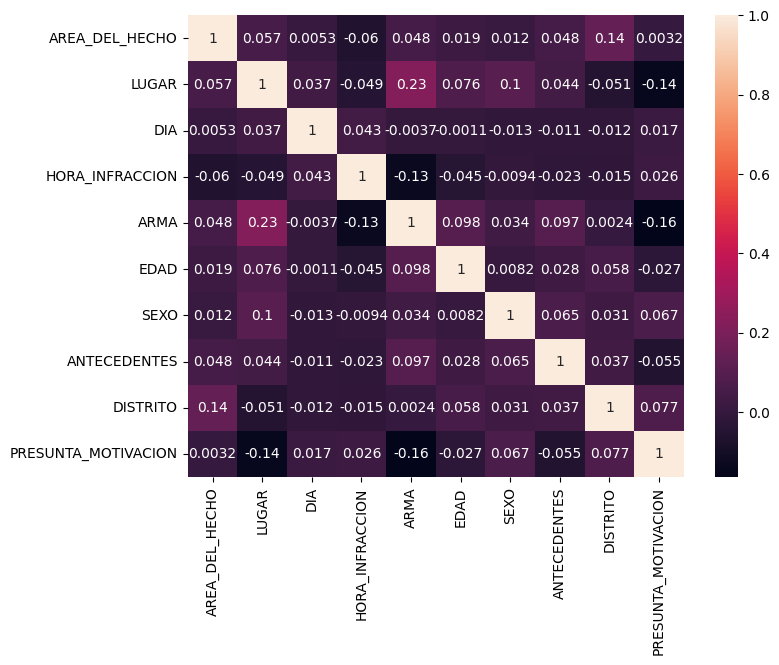

In [ ]:

#corelacion
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Supongamos que 'df' es tu DataFrame
# Variables binarias y multiclase
binary_vars = ['AREA_DEL_HECHO', 'ANTECEDENTES', 'SEXO', 'LUGAR']
multiclass_vars = [ 'DISTRITO', 'ARMA',
                    'DIA', 'HORA_INFRACCION', 'EDAD']
target = 'PRESUNTA_MOTIVACION'  # Variable target

# Separar variables predictoras (X) y la variable target (Y)
X = df.drop(columns=[target])  # Excluye la variable target
Y = df[target]  # Variable target

# Realizamos la codificación de las variables categóricas
X_encoded = pd.get_dummies(X, drop_first=False)

sampling_strategy = {
    2: 5882,
    1: 1806,
    3: 1040,
    4: 1030,
    5: 1020,
    6: 990

}
# Paso 4: Aplicar SMOTE con la estrategia de muestreo personalizada
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42, k_neighbors=1)
X_res, Y_res = smote.fit_resample(X_encoded, Y)

# Paso 5: Verificar el balance de clases después de aplicar SMOTE
print("Distribución de clases después de SMOTE:")
print(pd.Series(Y_res).value_counts())

# Verificar que el número total de registros es 11,768
print(f"Tamaño total del dataset después del balanceo: {X_res.shape[0]}")

# Paso 6: Exportar los datos balanceados de la variable target a archivos CSV y Excel
df_resampled_target_only = pd.DataFrame({target: Y_res})

# Exportar los datos balanceados de la variable target a archivos CSV y Excel
output_file_path_csv = '/content/drive/My Drive/MOTIV_BALANC_VAR_LISTO.csv'
df_resampled_target_only.to_csv(output_file_path_csv, index=False)

output_file_path_xlsx = '/content/drive/My Drive/MOTIV_BALANC_VAR_LISTO.xlsx'
df_resampled_target_only.to_excel(output_file_path_xlsx, index=False)

print(f"La variable target balanceada ha sido exportada a '{output_file_path_csv}' y '{output_file_path_xlsx}'")



Distribución de clases después de SMOTE:
PRESUNTA_MOTIVACION
2    5882
1    1806
3    1040
4    1030
5    1020
6     990
Name: count, dtype: int64
Tamaño total del dataset después del balanceo: 11768
La variable target balanceada ha sido exportada a '/content/drive/My Drive/MOTIV_BALANC_VAR_LISTO.csv' y '/content/drive/My Drive/MOTIV_BALANC_VAR_LISTO.xlsx'


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Supongamos que 'df' es tu DataFrame
# Variables binarias y multiclase
binary_vars = ['AREA_DEL_HECHO', 'ANTECEDENTES', 'SEXO', 'LUGAR']
multiclass_vars = [ 'PRESUNTA_MOTIVACION', 'ARMA',
                    'DIA', 'HORA_INFRACCION', 'EDAD']
target = 'DISTRITO'  # Variable target


# Separar variables predictoras (X) y la variable target (Y)
X = df.drop(columns=[target])  # Excluye la variable target
Y = df[target]  # Variable target

# Realizamos la codificación de las variables categóricas
X_encoded = pd.get_dummies(X, drop_first=False)
sampling_strategy = {
    1: 5240,
    2: 3418,
    3: 3110

}

# Paso 4: Aplicar SMOTE con la estrategia de muestreo personalizada
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_res, Y_res = smote.fit_resample(X_encoded, Y)

# Paso 5: Verificar el balance de clases después de aplicar SMOTE
print("Distribución de clases después de SMOTE:")
print(pd.Series(Y_res).value_counts())

# Verificar que el número total de registros es 11,768
print(f"Tamaño total del dataset después del balanceo: {X_res.shape[0]}")

# Paso 6: Exportar los datos balanceados de la variable target a archivos CSV y Excel
df_resampled_target_only = pd.DataFrame({target: Y_res})

# Exportar los datos balanceados de la variable target a archivos CSV y Excel
output_file_path_csv = '/content/drive/My Drive/DISTRITO_BALANC_VAR_LISTO.csv'
df_resampled_target_only.to_csv(output_file_path_csv, index=False)

output_file_path_xlsx = '/content/drive/My Drive/DISTRITO_BALANC_VAR_LISTO.xlsx'


Distribución de clases después de SMOTE:
DISTRITO
1    5240
2    3418
3    3110
Name: count, dtype: int64
Tamaño total del dataset después del balanceo: 11768


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Supongamos que 'df' es tu DataFrame
# Variables binarias y multiclase
binary_vars = ['ANTECEDENTES', 'SEXO', 'LUGAR']
multiclass_vars = ['DISTRITO', 'PRESUNTA_MOTIVACION', 'ARMA',
                    'DIA', 'HORA_INFRACCION', 'EDAD']
target = 'AREA_DEL_HECHO'  # Variable target

# Separar variables predictoras (X) y la variable target (Y)
X = df.drop(columns=[target])  # Excluye la variable target
Y = df[target]  # Variable target

# Verificar las columnas de X
print(f"Columnas en X (features): {X.columns}")

# Paso 1: Codificar las variables categóricas (multiclass) con OneHotEncoder
X_encoded = pd.get_dummies(X, drop_first=False)  # OneHotEncoding de todas las variables categóricas

# Asegúrate de que el tamaño de X_encoded y Y sean consistentes
print(f"Dimensiones de X_encoded: {X_encoded.shape}")
print(f"Dimensiones de Y: {Y.shape}")

# Paso 2: Aplicar SMOTE sobre las clases minoritarias para balancearlas
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_res, Y_res = smote.fit_resample(X_encoded, Y)

# Paso 3: Submuestreo para reducir las clases mayores y mantener el tamaño total deseado de 13,418 registros
# Definir el tamaño deseado del dataset balanceado
desired_size = 11768

# Aplicar RandomUnderSampler para igualar las clases y mantener el tamaño deseado
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, Y_resampled = undersampler.fit_resample(X_res, Y_res)

# Asegurarse de que el tamaño total después de submuestreo sea 13,418
if X_resampled.shape[0] > desired_size:
    X_resampled = X_resampled[:desired_size]
    Y_resampled = Y_resampled[:desired_size]

# Verificar que el número total de registros después del balanceo sea 13,418
print(f"Dimensiones después de SMOTE y submuestreo: {X_resampled.shape}")
print("Balance de clases después de aplicar SMOTE y submuestreo:")
print(pd.Series(Y_resampled).value_counts())

# Verificar que el tamaño total es 13,418
assert X_resampled.shape[0] == desired_size, f"El tamaño del dataset es incorrecto. Esperado: {desired_size}, Obtenido: {X_resampled.shape[0]}"

# Crear un DataFrame balanceado que solo incluya la variable target
df_resampled_target_only = pd.DataFrame({target: Y_resampled})

# Exportar los datos balanceados de la variable target a archivos CSV y Excel
output_file_path_csv = '/content/drive/My Drive/AREA_BALANC_VAR_LISTO.csv'
df_resampled_target_only.to_csv(output_file_path_csv, index=False)

output_file_path_xlsx = '/content/drive/My Drive/AREA_BALANC_VAR_LISTO.xlsx'
df_resampled_target_only.to_excel(output_file_path_xlsx, index=False)

print(f"La variable target balanceada ha sido exportada a '{output_file_path_csv}' y '{output_file_path_xlsx}'")



Columnas en X (features): Index(['LUGAR', 'DIA', 'HORA_INFRACCION', 'ARMA', 'EDAD', 'SEXO',
       'ANTECEDENTES', 'DISTRITO', 'PRESUNTA_MOTIVACION'],
      dtype='object')
Dimensiones de X_encoded: (6920, 9)
Dimensiones de Y: (6920,)
Dimensiones después de SMOTE y submuestreo: (11768, 9)
Balance de clases después de aplicar SMOTE y submuestreo:
AREA_DEL_HECHO
1    6709
2    5059
Name: count, dtype: int64
La variable target balanceada ha sido exportada a '/content/drive/My Drive/AREA_BALANC_VAR_LISTO.csv' y '/content/drive/My Drive/AREA_BALANC_VAR_LISTO.xlsx'


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Supongamos que 'df' es tu DataFrame
# Variables binarias y multiclase
binary_vars = ['AREA_DEL_HECHO', 'SEXO', 'LUGAR']
multiclass_vars = ['DISTRITO', 'PRESUNTA_MOTIVACION', 'ARMA',
                   'DIA', 'HORA_INFRACCION', 'EDAD']
target = 'ANTECEDENTES'  # Variable target

# Separar variables predictoras (X) y la variable target (Y)
X = df.drop(columns=[target])  # Excluye la variable target
Y = df[target]  # Variable target

# Realizamos la codificación de las variables categóricas
X_encoded = pd.get_dummies(X, drop_first=False)

# Paso 3: Establecer la estrategia de muestreo personalizada para SMOTE
# Las clases 6 (SÁBADO) y 7 (DOMINGO) serán las mayoritarias (2,804 registros cada una)
# Las otras clases se ajustan a 1,232 registros
sampling_strategy = {
    1: 5984,
    2: 5784
}

# Paso 4: Aplicar SMOTE con la estrategia de muestreo personalizada
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_res, Y_res = smote.fit_resample(X_encoded, Y)

# Paso 5: Verificar el balance de clases después de aplicar SMOTE
print("Distribución de clases después de SMOTE:")
print(pd.Series(Y_res).value_counts())

# Verificar que el número total de registros es 11,768
print(f"Tamaño total del dataset después del balanceo: {X_res.shape[0]}")

# Paso 6: Exportar los datos balanceados de la variable target a archivos CSV y Excel
df_resampled_target_only = pd.DataFrame({target: Y_res})

# Exportar los datos balanceados de la variable target a archivos CSV y Excel
output_file_path_csv = '/content/drive/My Drive/ANTECEDENTES_BALANC_VAR_LISTO.csv'
df_resampled_target_only.to_csv(output_file_path_csv, index=False)

output_file_path_xlsx = '/content/drive/My Drive/ANTECEDENTES_BALANC_VAR_LISTO.xlsx'
df_resampled_target_only.to_excel(output_file_path_xlsx, index=False)

print(f"La variable target balanceada ha sido exportada a '{output_file_path_csv}' y '{output_file_path_xlsx}'")


Distribución de clases después de SMOTE:
ANTECEDENTES
1    5984
2    5784
Name: count, dtype: int64
Tamaño total del dataset después del balanceo: 11768
La variable target balanceada ha sido exportada a '/content/drive/My Drive/ANTECEDENTES_BALANC_VAR_LISTO.csv' y '/content/drive/My Drive/ANTECEDENTES_BALANC_VAR_LISTO.xlsx'


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Supongamos que 'df' es tu DataFrame
# Variables binarias y multiclase
binary_vars = ['AREA_DEL_HECHO', 'ANTECEDENTES', 'LUGAR']
multiclass_vars = ['DISTRITO', 'PRESUNTA_MOTIVACION', 'ARMA',
                    'DIA', 'HORA_INFRACCION', 'EDAD']
target = 'SEXO'  # Variable target

# Separar variables predictoras (X) y la variable target (Y)
X = df.drop(columns=[target])  # Excluye la variable target
Y = df[target]  # Variable target

# Verificar las columnas de X
print(f"Columnas en X (features): {X.columns}")

# Paso 1: Codificar las variables categóricas (multiclass) con OneHotEncoder
X_encoded = pd.get_dummies(X, drop_first=False)  # OneHotEncoding de todas las variables categóricas

# Asegúrate de que el tamaño de X_encoded y Y sean consistentes
print(f"Dimensiones de X_encoded: {X_encoded.shape}")
print(f"Dimensiones de Y: {Y.shape}")

# Paso 2: Aplicar SMOTE sobre las clases minoritarias para balancearlas
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_res, Y_res = smote.fit_resample(X_encoded, Y)

# Paso 3: Submuestreo para reducir las clases mayores y mantener el tamaño total deseado de 11,768 registros
# Definir el tamaño deseado del dataset balanceado
desired_size = 11768

# Aplicar RandomUnderSampler para igualar las clases y mantener el tamaño deseado
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, Y_resampled = undersampler.fit_resample(X_res, Y_res)

# Asegurarse de que el tamaño total después de submuestreo sea 11,768
if X_resampled.shape[0] > desired_size:
    X_resampled = X_resampled[:desired_size]
    Y_resampled = Y_resampled[:desired_size]

# Verificar que el número total de registros después del balanceo sea 11,768
print(f"Dimensiones después de SMOTE y submuestreo: {X_resampled.shape}")
print("Balance de clases después de aplicar SMOTE y submuestreo:")
print(pd.Series(Y_resampled).value_counts())

# Verificar que el tamaño total es 11,768
assert X_resampled.shape[0] == desired_size, f"El tamaño del dataset es incorrecto. Esperado: {desired_size}, Obtenido: {X_resampled.shape[0]}"

# Crear un DataFrame balanceado que solo incluya la variable target
df_resampled_target_only = pd.DataFrame({target: Y_resampled})

# Exportar los datos balanceados de la variable target a archivos CSV y Excel
output_file_path_csv = '/content/drive/My Drive/SEXO_BALANC_VAR_LISTO.csv'
df_resampled_target_only.to_csv(output_file_path_csv, index=False)

output_file_path_xlsx = '/content/drive/My Drive/SEXO_BALANC_VAR_LISTO.xlsx'
df_resampled_target_only.to_excel(output_file_path_xlsx, index=False)

print(f"La variable target balanceada ha sido exportada a '{output_file_path_csv}' y '{output_file_path_xlsx}'")


Columnas en X (features): Index(['AREA_DEL_HECHO', 'LUGAR', 'DIA', 'HORA_INFRACCION', 'ARMA', 'EDAD',
       'ANTECEDENTES', 'DISTRITO', 'PRESUNTA_MOTIVACION'],
      dtype='object')
Dimensiones de X_encoded: (6920, 9)
Dimensiones de Y: (6920,)
Dimensiones después de SMOTE y submuestreo: (11768, 9)
Balance de clases después de aplicar SMOTE y submuestreo:
SEXO
1    6474
2    5294
Name: count, dtype: int64
La variable target balanceada ha sido exportada a '/content/drive/My Drive/SEXO_BALANC_VAR_LISTO.csv' y '/content/drive/My Drive/SEXO_BALANC_VAR_LISTO.xlsx'


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Supongamos que 'df' es tu DataFrame
# Variables binarias y multiclase
binary_vars = ['AREA_DEL_HECHO', 'ANTECEDENTES', 'SEXO']
multiclass_vars = ['DISTRITO', 'PRESUNTA_MOTIVACION', 'ARMA',
                   'DIA', 'HORA_INFRACCION', 'EDAD']
target = 'LUGAR'  # Variable target

# Separar variables predictoras (X) y la variable target (Y)
X = df.drop(columns=[target])  # Excluye la variable target
Y = df[target]  # Variable target

# Realizamos la codificación de las variables categóricas
X_encoded = pd.get_dummies(X, drop_first=False)

sampling_strategy = {
    1: 5984,
    2: 5784
}

# Paso 4: Aplicar SMOTE con la estrategia de muestreo personalizada
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_res, Y_res = smote.fit_resample(X_encoded, Y)

# Paso 5: Verificar el balance de clases después de aplicar SMOTE
print("Distribución de clases después de SMOTE:")
print(pd.Series(Y_res).value_counts())

# Verificar que el número total de registros es 11,768
print(f"Tamaño total del dataset después del balanceo: {X_res.shape[0]}")

# Paso 6: Exportar los datos balanceados de la variable target a archivos CSV y Excel
df_resampled_target_only = pd.DataFrame({target: Y_res})

# Exportar los datos balanceados de la variable target a archivos CSV y Excel
output_file_path_csv = '/content/drive/My Drive/LUGAR_BALANC_VAR_LISTO.csv'
df_resampled_target_only.to_csv(output_file_path_csv, index=False)

output_file_path_xlsx = '/content/drive/My Drive/LUGAR_BALANC_VAR_LISTO.xlsx'
df_resampled_target_only.to_excel(output_file_path_xlsx, index=False)

print(f"La variable target balanceada ha sido exportada a '{output_file_path_csv}' y '{output_file_path_xlsx}'")


Distribución de clases después de SMOTE:
LUGAR
1    5984
2    5784
Name: count, dtype: int64
Tamaño total del dataset después del balanceo: 11768
La variable target balanceada ha sido exportada a '/content/drive/My Drive/LUGAR_BALANC_VAR_LISTO.csv' y '/content/drive/My Drive/LUGAR_BALANC_VAR_LISTO.xlsx'


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

binary_vars = ['AREA_DEL_HECHO', 'ANTECEDENTES', 'SEXO', 'LUGAR']
multiclass_vars = [ 'DISTRITO', 'PRESUNTA_MOTIVACION',
                    'ARMA', 'HORA_INFRACCION', 'EDAD']
target = 'EDAD'  # Variable target
# Definir el tamaño de cada clase

# Paso 2: Codificar las variables categóricas usando OneHotEncoder
X = df.drop(columns=[target])  # Excluye la variable target
Y = df[target]  # Variable target

# Realizamos la codificación de las variables categóricas
X_encoded = pd.get_dummies(X, drop_first=False)


sampling_strategy = {
    1: 2904,
    2: 5857,
    3: 1575,
    4: 1432
}

# Paso 4: Aplicar SMOTE con la estrategia de muestreo personalizada
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_res, Y_res = smote.fit_resample(X_encoded, Y)

# Paso 5: Verificar el balance de clases después de aplicar SMOTE
print("Distribución de clases después de SMOTE:")
print(pd.Series(Y_res).value_counts())

# Verificar que el número total de registros es 11,768
print(f"Tamaño total del dataset después del balanceo: {X_res.shape[0]}")

# Paso 6: Exportar los datos balanceados de la variable target a archivos CSV y Excel
df_resampled_target_only = pd.DataFrame({target: Y_res})

output_file_path_csv = '/content/drive/My Drive/EDAD_BALANC_VAR_LISTO.csv'
output_file_path_xlsx = '/content/drive/My Drive/EDAD_BALANC_VAR_LISTO.xlsx'

df_resampled_target_only.to_csv(output_file_path_csv, index=False)
df_resampled_target_only.to_excel(output_file_path_xlsx, index=False)

print(f"La variable target balanceada ha sido exportada a '{output_file_path_csv}' y '{output_file_path_xlsx}'")



Distribución de clases después de SMOTE:
EDAD
2    5857
1    2904
3    1575
4    1432
Name: count, dtype: int64
Tamaño total del dataset después del balanceo: 11768
La variable target balanceada ha sido exportada a '/content/drive/My Drive/EDAD_BALANC_VAR_LISTO.csv' y '/content/drive/My Drive/EDAD_BALANC_VAR_LISTO.xlsx'


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Supongamos que 'df' es tu DataFrame
# Variables binarias y multiclase
binary_vars = ['AREA_DEL_HECHO', 'ANTECEDENTES', 'SEXO', 'LUGAR']
multiclass_vars = [ 'DISTRITO', 'PRESUNTA_MOTIVACION',
                    'DIA', 'HORA_INFRACCION', 'EDAD']
target = 'ARMA'  # Variable target


# Paso 2: Codificar las variables categóricas usando OneHotEncoder
X = df.drop(columns=[target])  # Excluye la variable target
Y = df[target]  # Variable target

# Realizamos la codificación de las variables categóricas
X_encoded = pd.get_dummies(X, drop_first=False)


sampling_strategy = {
    1: 6103,
    2: 2003,
    3: 1305,
    4: 1205,
    5: 1152
}

# Paso 4: Aplicar SMOTE con la estrategia de muestreo personalizada
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_res, Y_res = smote.fit_resample(X_encoded, Y)

# Paso 5: Verificar el balance de clases después de aplicar SMOTE
print("Distribución de clases después de SMOTE:")
print(pd.Series(Y_res).value_counts())

# Verificar que el número total de registros es 11,768
print(f"Tamaño total del dataset después del balanceo: {X_res.shape[0]}")

# Paso 6: Exportar los datos balanceados de la variable target a archivos CSV y Excel
df_resampled_target_only = pd.DataFrame({target: Y_res})

output_file_path_csv = '/content/drive/My Drive/ARMA_BALANC_VAR_LISTO.csv'
output_file_path_xlsx = '/content/drive/My Drive/ARMA_BALANC_VAR_LISTO.xlsx'

df_resampled_target_only.to_csv(output_file_path_csv, index=False)
df_resampled_target_only.to_excel(output_file_path_xlsx, index=False)

print(f"La variable target balanceada ha sido exportada a '{output_file_path_csv}' y '{output_file_path_xlsx}'")



Distribución de clases después de SMOTE:
ARMA
1    6103
2    2003
3    1305
4    1205
5    1152
Name: count, dtype: int64
Tamaño total del dataset después del balanceo: 11768
La variable target balanceada ha sido exportada a '/content/drive/My Drive/ARMA_BALANC_VAR_LISTO.csv' y '/content/drive/My Drive/ARMA_BALANC_VAR_LISTO.xlsx'


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Supongamos que 'df' es tu DataFrame
# Variables binarias y multiclase
binary_vars = ['AREA_DEL_HECHO', 'ANTECEDENTES', 'SEXO', 'LUGAR']
multiclass_vars = [ 'DISTRITO', 'PRESUNTA_MOTIVACION',
                    'ARMA', 'DIA', 'EDAD']
target = 'HORA_INFRACCION'  # Variable target


# Paso 2: Codificar las variables categóricas usando OneHotEncoder
X = df.drop(columns=[target])  # Excluye la variable target
Y = df[target]  # Variable target

# Realizamos la codificación de las variables categóricas
X_encoded = pd.get_dummies(X, drop_first=False)

sampling_strategy = {
    3: 3118,
    2: 3000,
    0: 2850,
    1: 2800
}

# Paso 4: Aplicar SMOTE con la estrategia de muestreo personalizada
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_res, Y_res = smote.fit_resample(X_encoded, Y)

# Paso 5: Verificar el balance de clases después de aplicar SMOTE
print("Distribución de clases después de SMOTE:")
print(pd.Series(Y_res).value_counts())

# Verificar que el número total de registros es 11,768
print(f"Tamaño total del dataset después del balanceo: {X_res.shape[0]}")

# Paso 6: Exportar los datos balanceados de la variable target a archivos CSV y Excel
df_resampled_target_only = pd.DataFrame({target: Y_res})

output_file_path_csv = '/content/drive/My Drive/HORA_BALANC_VAR_LISTO.csv'
output_file_path_xlsx = '/content/drive/My Drive/HORA_BALANC_VAR_LISTO.xlsx'

df_resampled_target_only.to_csv(output_file_path_csv, index=False)
df_resampled_target_only.to_excel(output_file_path_xlsx, index=False)

print(f"La variable target balanceada ha sido exportada a '{output_file_path_csv}' y '{output_file_path_xlsx}'")


Distribución de clases después de SMOTE:
HORA_INFRACCION
3    3118
2    3000
0    2850
1    2800
Name: count, dtype: int64
Tamaño total del dataset después del balanceo: 11768
La variable target balanceada ha sido exportada a '/content/drive/My Drive/HORA_BALANC_VAR_LISTO.csv' y '/content/drive/My Drive/HORA_BALANC_VAR_LISTO.xlsx'


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Supongamos que 'df' es tu DataFrame
# Variables binarias y multiclase
binary_vars = ['AREA_DEL_HECHO', 'ANTECEDENTES', 'SEXO', 'LUGAR']
multiclass_vars = [ 'DISTRITO', 'PRESUNTA_MOTIVACION',
                    'ARMA', 'DIA', 'HORA_INFRACCION']
target = 'DIA'  # Variable target

# Paso 2: Codificar las variables categóricas usando OneHotEncoder
X = df.drop(columns=[target])  # Excluye la variable target
Y = df[target]  # Variable target

# Realizamos la codificación de las variables categóricas
X_encoded = pd.get_dummies(X, drop_first=False)


sampling_strategy = {
    1: 3941,
    2: 2717,
    3: 2700,
    4: 2410
}

# Paso 4: Aplicar SMOTE con la estrategia de muestreo personalizada
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_res, Y_res = smote.fit_resample(X_encoded, Y)

# Paso 5: Verificar el balance de clases después de aplicar SMOTE
print("Distribución de clases después de SMOTE:")
print(pd.Series(Y_res).value_counts())

# Verificar que el número total de registros es 11,768
print(f"Tamaño total del dataset después del balanceo: {X_res.shape[0]}")

# Paso 6: Exportar los datos balanceados de la variable target a archivos CSV y Excel
df_resampled_target_only = pd.DataFrame({target: Y_res})

output_file_path_csv = '/content/drive/My Drive/DIA_BALANC_VAR_LISTO.csv'
output_file_path_xlsx = '/content/drive/My Drive/DIA_BALANC_VAR_LISTO.xlsx'

df_resampled_target_only.to_csv(output_file_path_csv, index=False)
df_resampled_target_only.to_excel(output_file_path_xlsx, index=False)

print(f"La variable target balanceada ha sido exportada a '{output_file_path_csv}' y '{output_file_path_xlsx}'")


Distribución de clases después de SMOTE:
DIA
1    3941
2    2717
3    2700
4    2410
Name: count, dtype: int64
Tamaño total del dataset después del balanceo: 11768
La variable target balanceada ha sido exportada a '/content/drive/My Drive/DIA_BALANC_VAR_LISTO.csv' y '/content/drive/My Drive/DIA_BALANC_VAR_LISTO.xlsx'


In [ ]:
import pandas as pd

# Lista de rutas a los archivos
input_file_paths = [
    '/content/drive/My Drive/DIA_BALANC_VAR_LISTO.csv',
    '/content/drive/My Drive/HORA_BALANC_VAR_LISTO.csv',
    '/content/drive/My Drive/ARMA_BALANC_VAR_LISTO.csv',
    '/content/drive/My Drive/EDAD_BALANC_VAR_LISTO.csv',
    '/content/drive/My Drive/LUGAR_BALANC_VAR_LISTO.csv',
    '/content/drive/My Drive/SEXO_BALANC_VAR_LISTO.csv',
    '/content/drive/My Drive/ANTECEDENTES_BALANC_VAR_LISTO.csv',
    '/content/drive/My Drive/AREA_BALANC_VAR_LISTO.csv',
    '/content/drive/My Drive/DISTRITO_BALANC_VAR_LISTO.csv',
    '/content/drive/My Drive/MOTIV_BALANC_VAR_LISTO.csv'
]

# Lista para almacenar los DataFrames
dataframes = []

# Leer cada archivo y almacenarlo en la lista
for file_path in input_file_paths:
    df = pd.read_csv(file_path)
    # Seleccionar la primera columna si el archivo tiene más de una
    if df.shape[1] > 1:
        df = df.iloc[:, 0]
    dataframes.append(df)

# Combinar todos los DataFrames como columnas en uno solo
combined_df = pd.concat(dataframes, axis=1)

# Renombrar las columnas para identificar de dónde provienen
column_names = [
    'DIA', 'HORA_INFRACCION', 'ARMA', 'EDAD', 'LUGAR',
    'SEXO', 'ANTECEDENTES', 'AREA_DEL_HECHO', 'DISTRITO', 'PRESUNTA_MOTIVACION'
]
combined_df.columns = column_names

# Guardar el DataFrame combinado en un archivo CSV
output_csv_path = '/content/drive/My Drive/DATASET_BALANCEADO_LIST.csv'
combined_df.to_csv(output_csv_path, index=False)

# Guardar el DataFrame combinado en un archivo Excel
output_excel_path = '/content/drive/My Drive/DATASET_BALANCEADO_LIST.xlsx'
combined_df.to_excel(output_excel_path, index=False, engine='openpyxl')

print(f"Dataset combinado guardado en {output_csv_path} y {output_excel_path}")



Dataset combinado guardado en /content/drive/My Drive/DATASET_BALANCEADO_LIST.csv y /content/drive/My Drive/DATASET_BALANCEADO_LIST.xlsx
